<a href="https://colab.research.google.com/github/fabiobanyu/Tugas_Besar/blob/main/Projek_KK_RND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Disclaimer

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the accompanying [Blog Post](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Jun 29 15:07:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 39.2ms
Speed: 2.6ms preprocess, 39.2ms inference, 139.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


[Errno 2] No such file or directory: '{HOME}'
/content


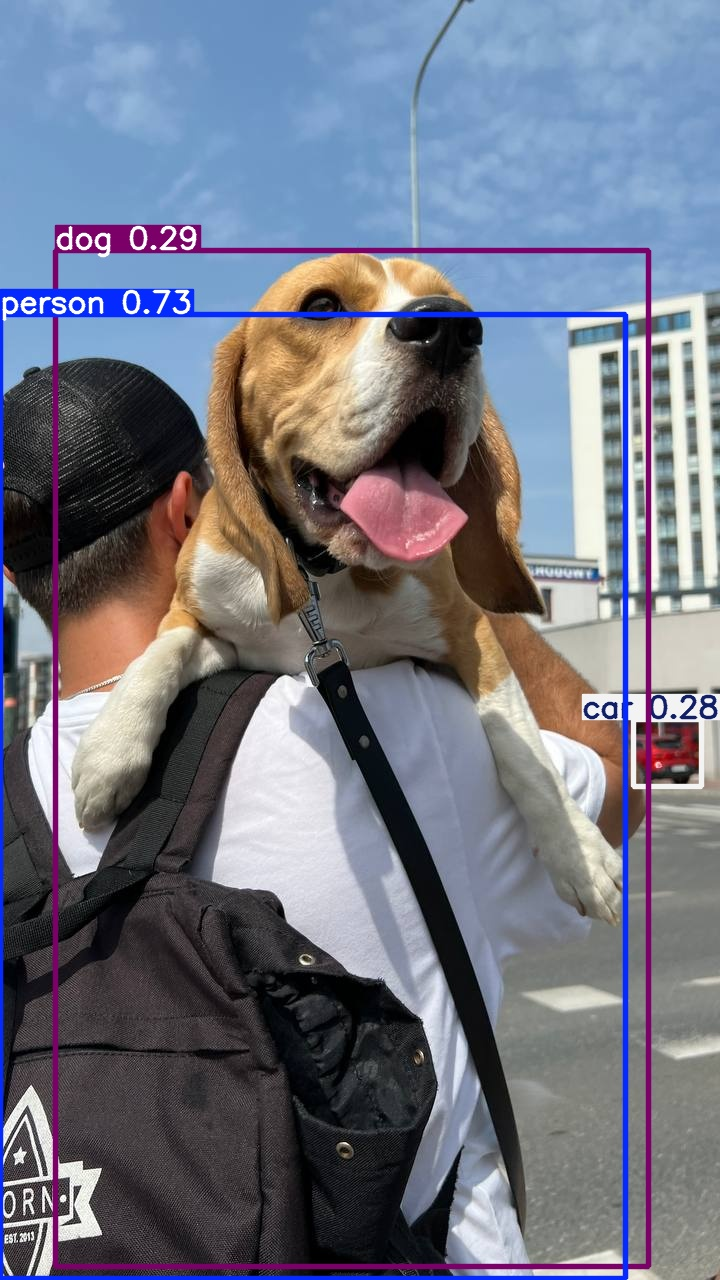

In [5]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [9]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 45.6ms
Speed: 2.0ms preprocess, 45.6ms inference, 149.7ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [12]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format. (Formerly, we used to use `Yolov5`, as the gif shows)

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [13]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="gwOXX2S8BGnCsfYFKGav")
project = rf.workspace("adylabs").project("kartu-keluarga-ocr")
version = project.version(7)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kartu-Keluarga-OCR-7 in yolov8:: 100%|██████████| 530/530 [00:00<00:00, 6060.36it/s]


## Custom Training

In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 178MB/s]
New https://pypi.org/project/ultralytics/8.3.160 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Kartu-Keluarga-OCR-7/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

/content


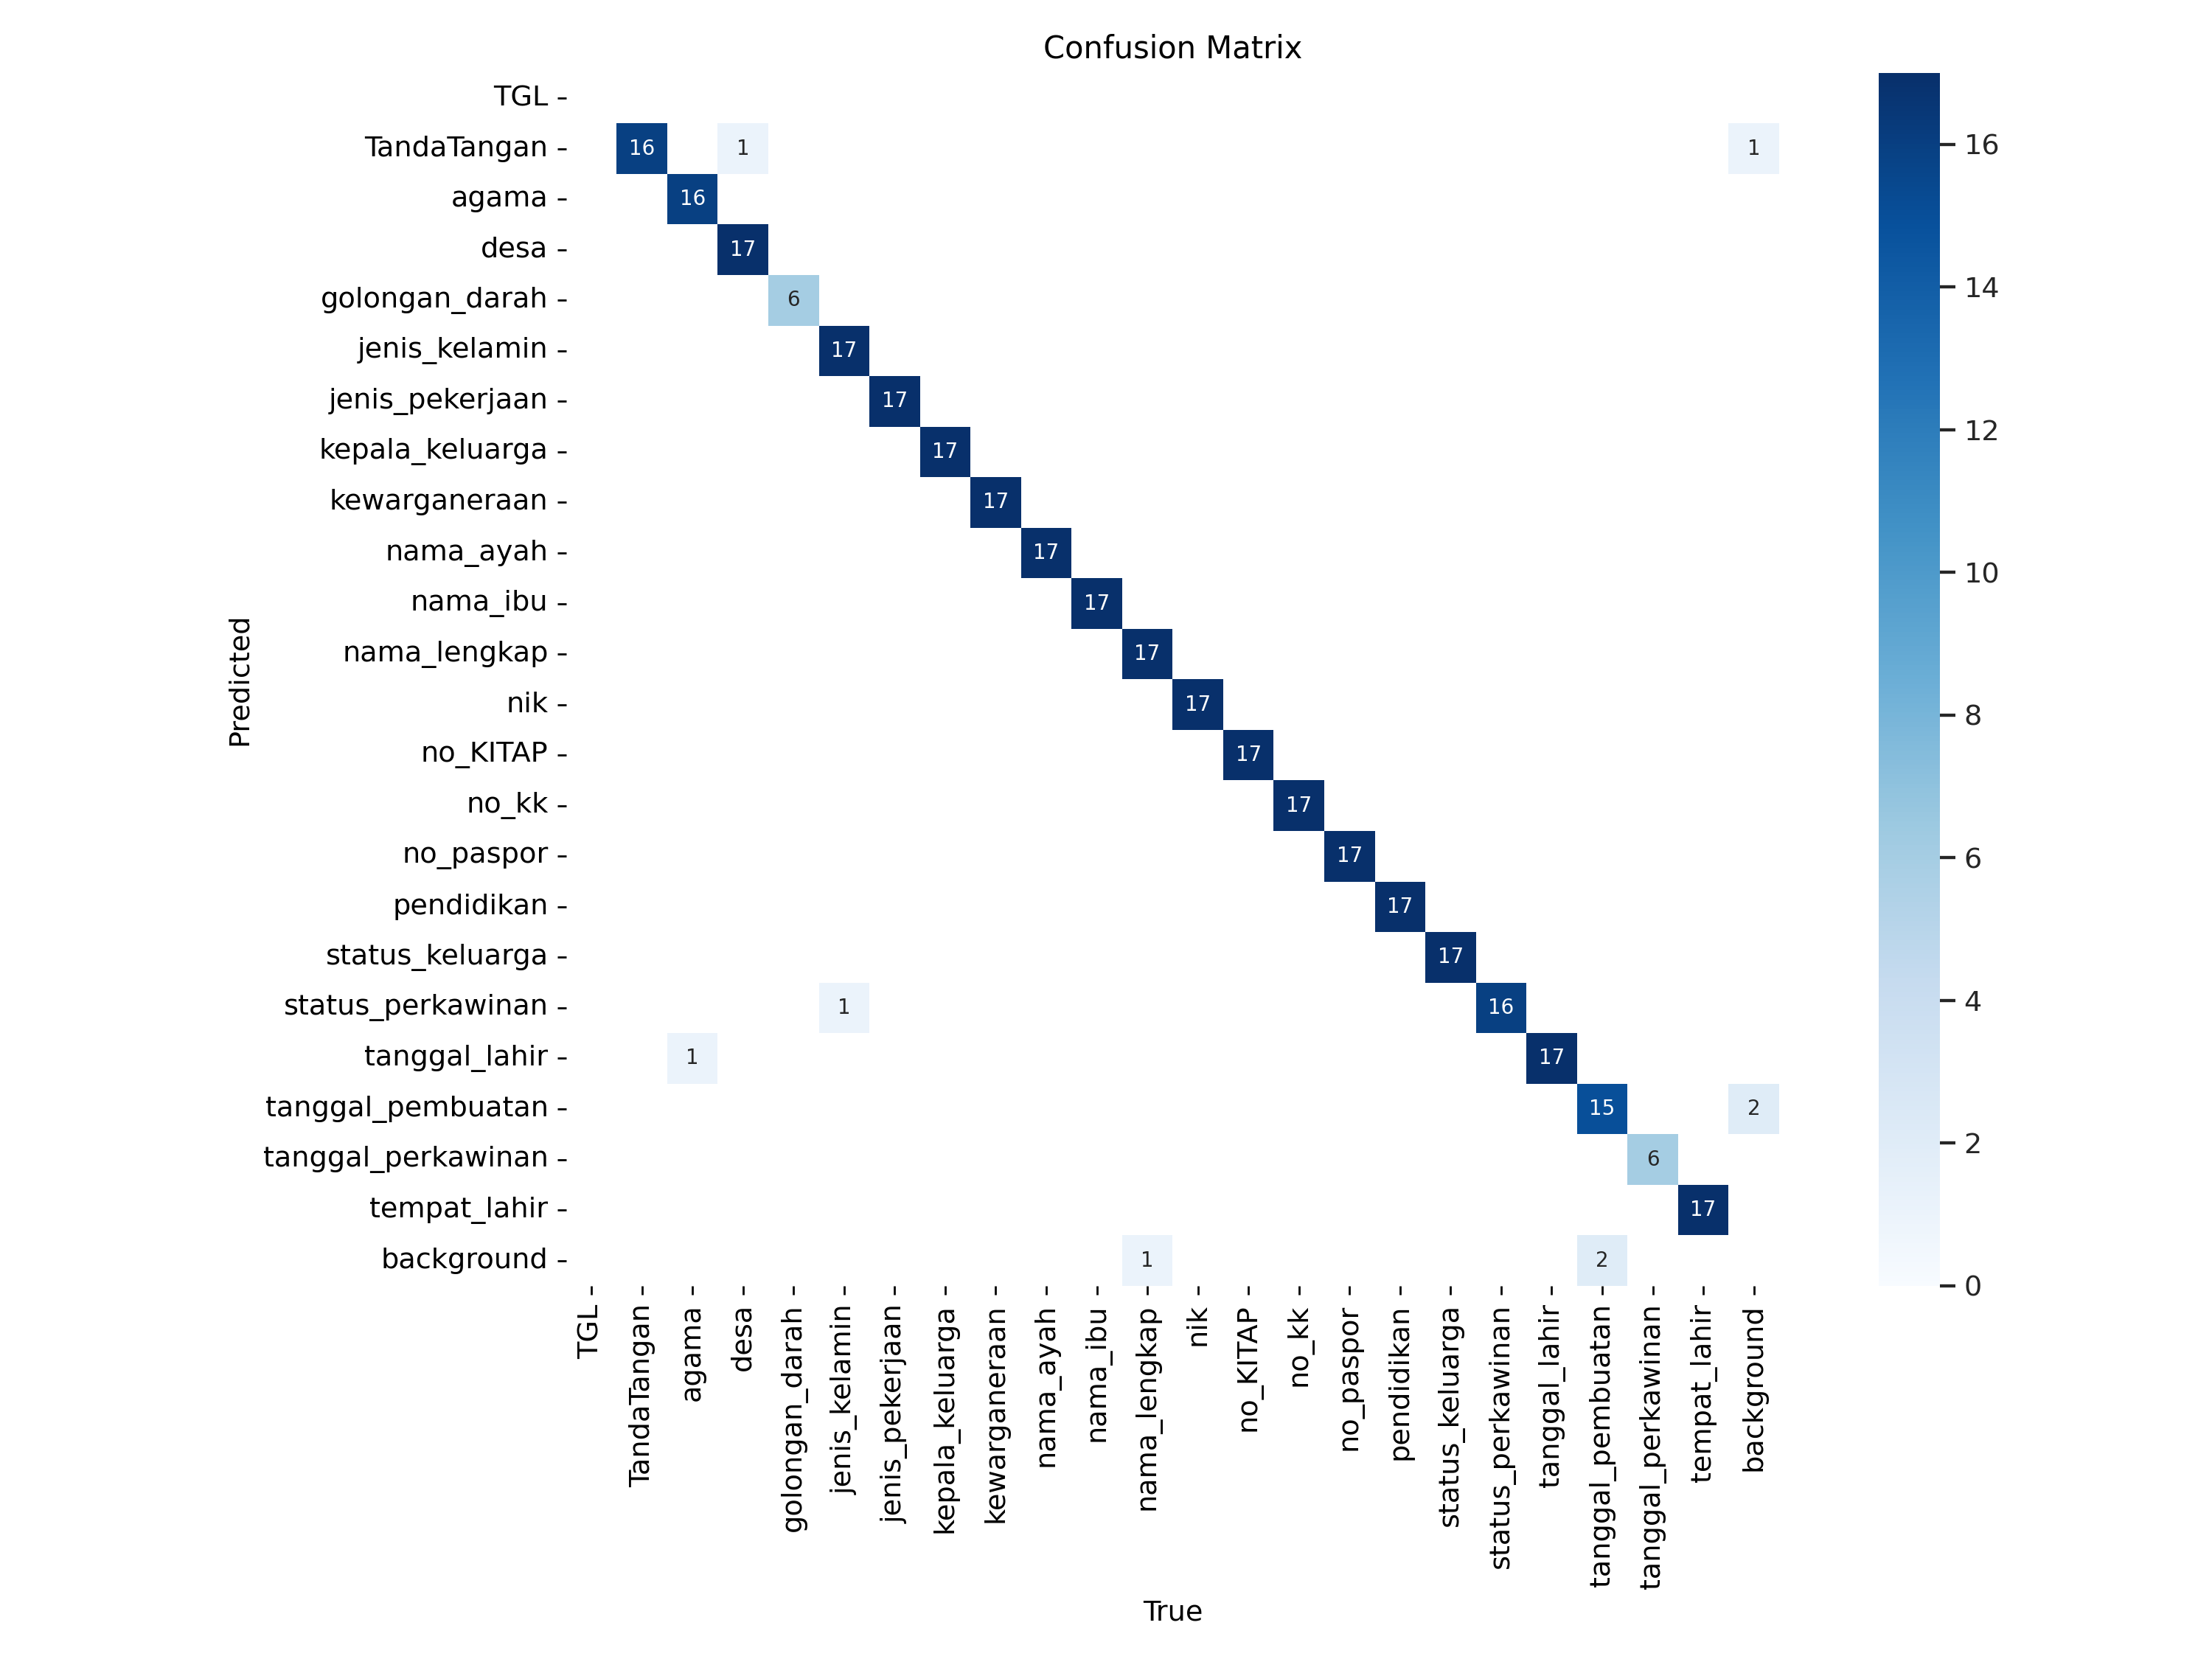

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


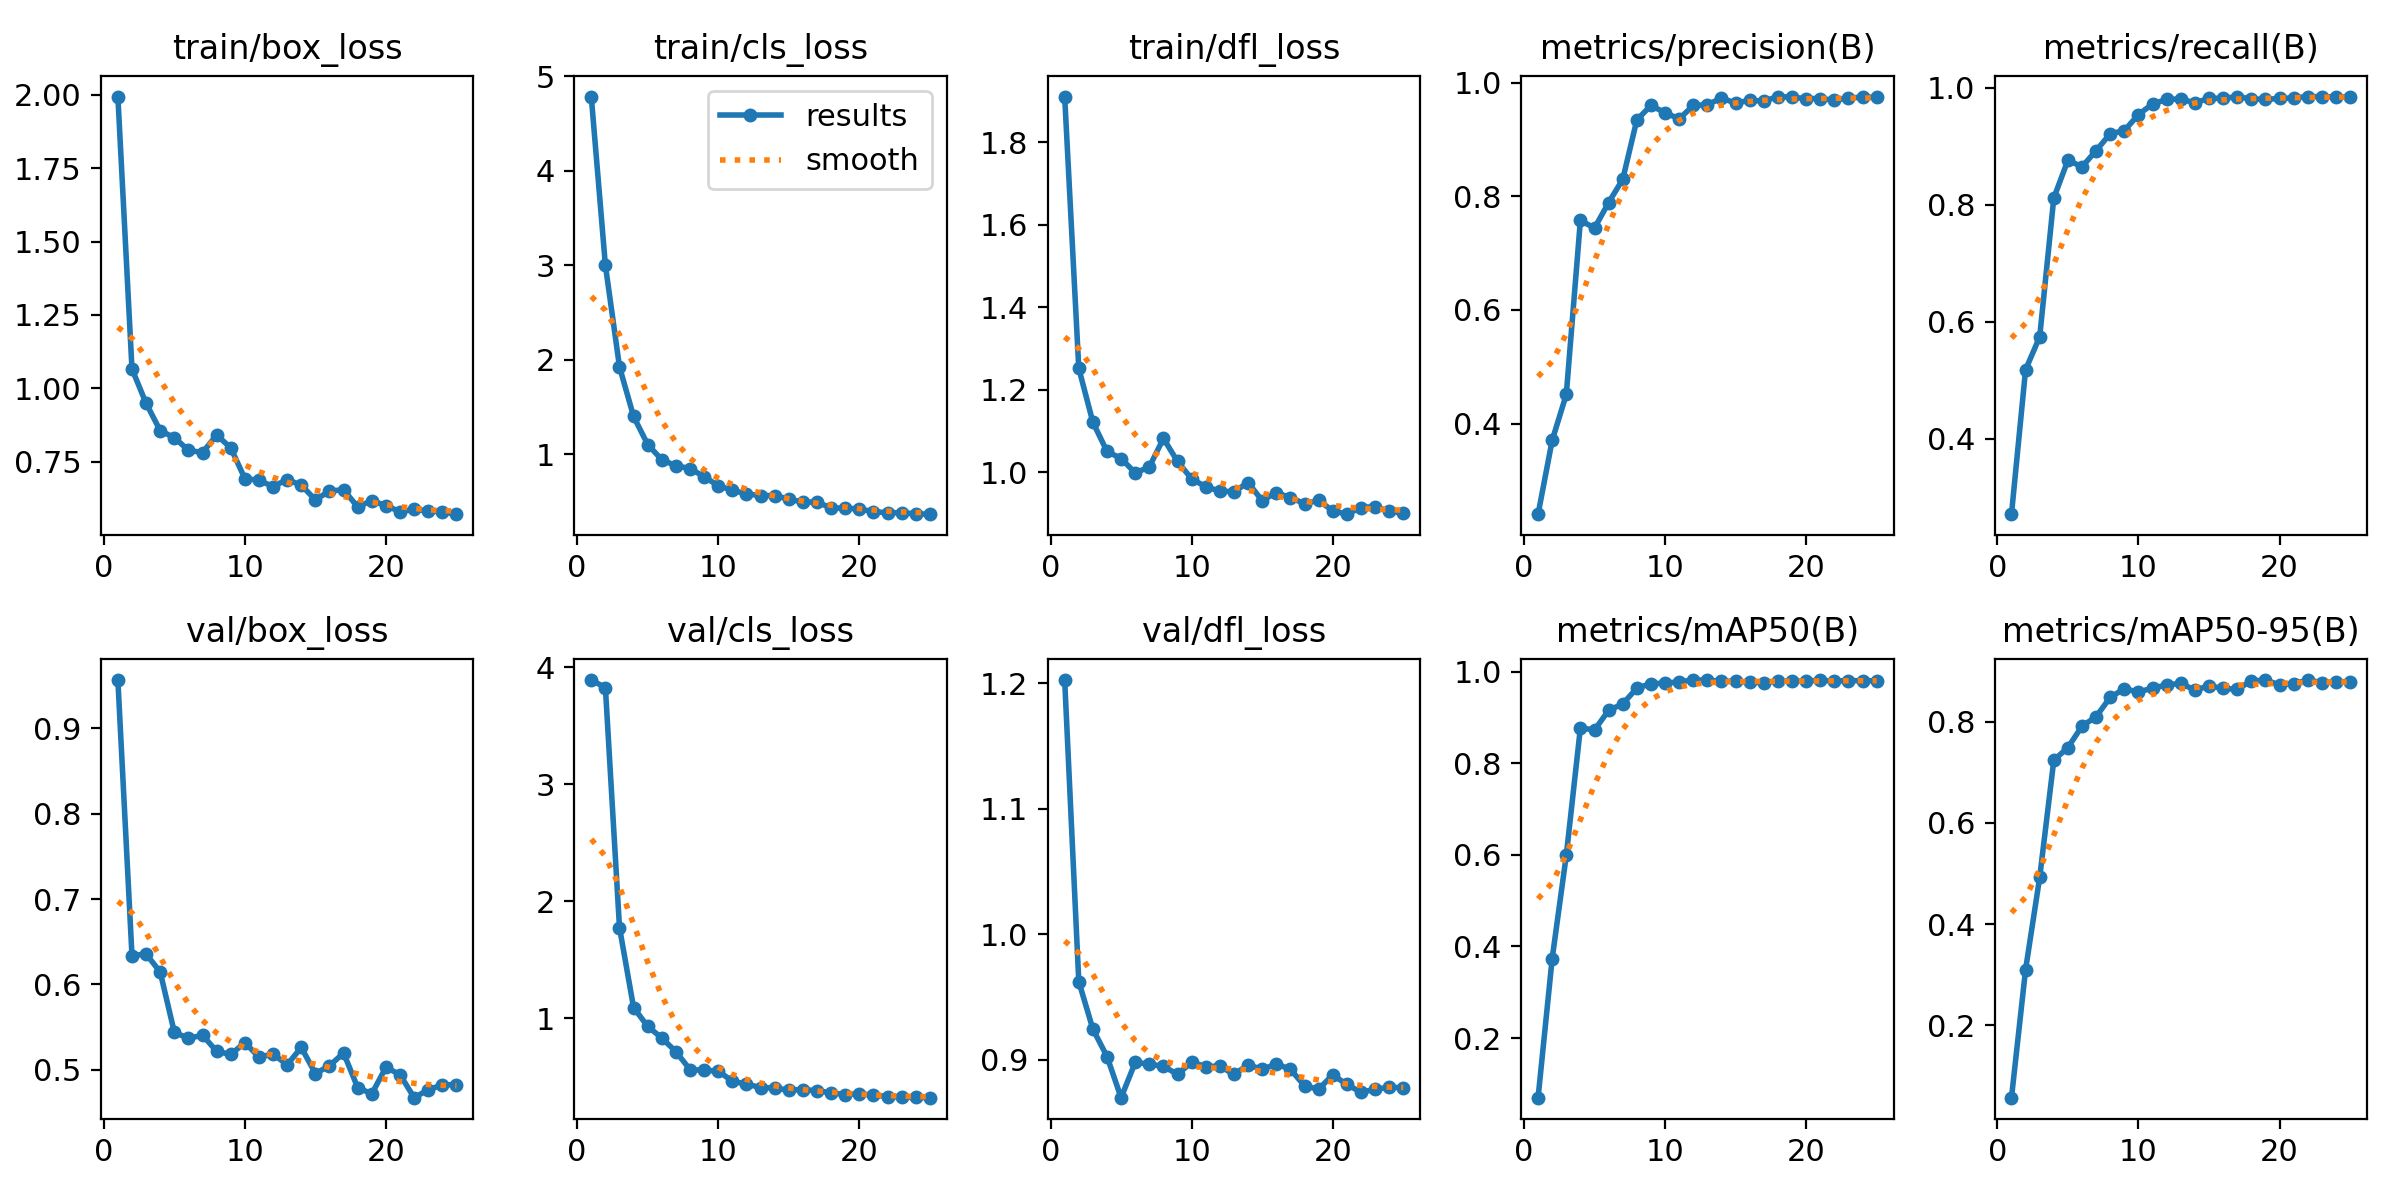

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


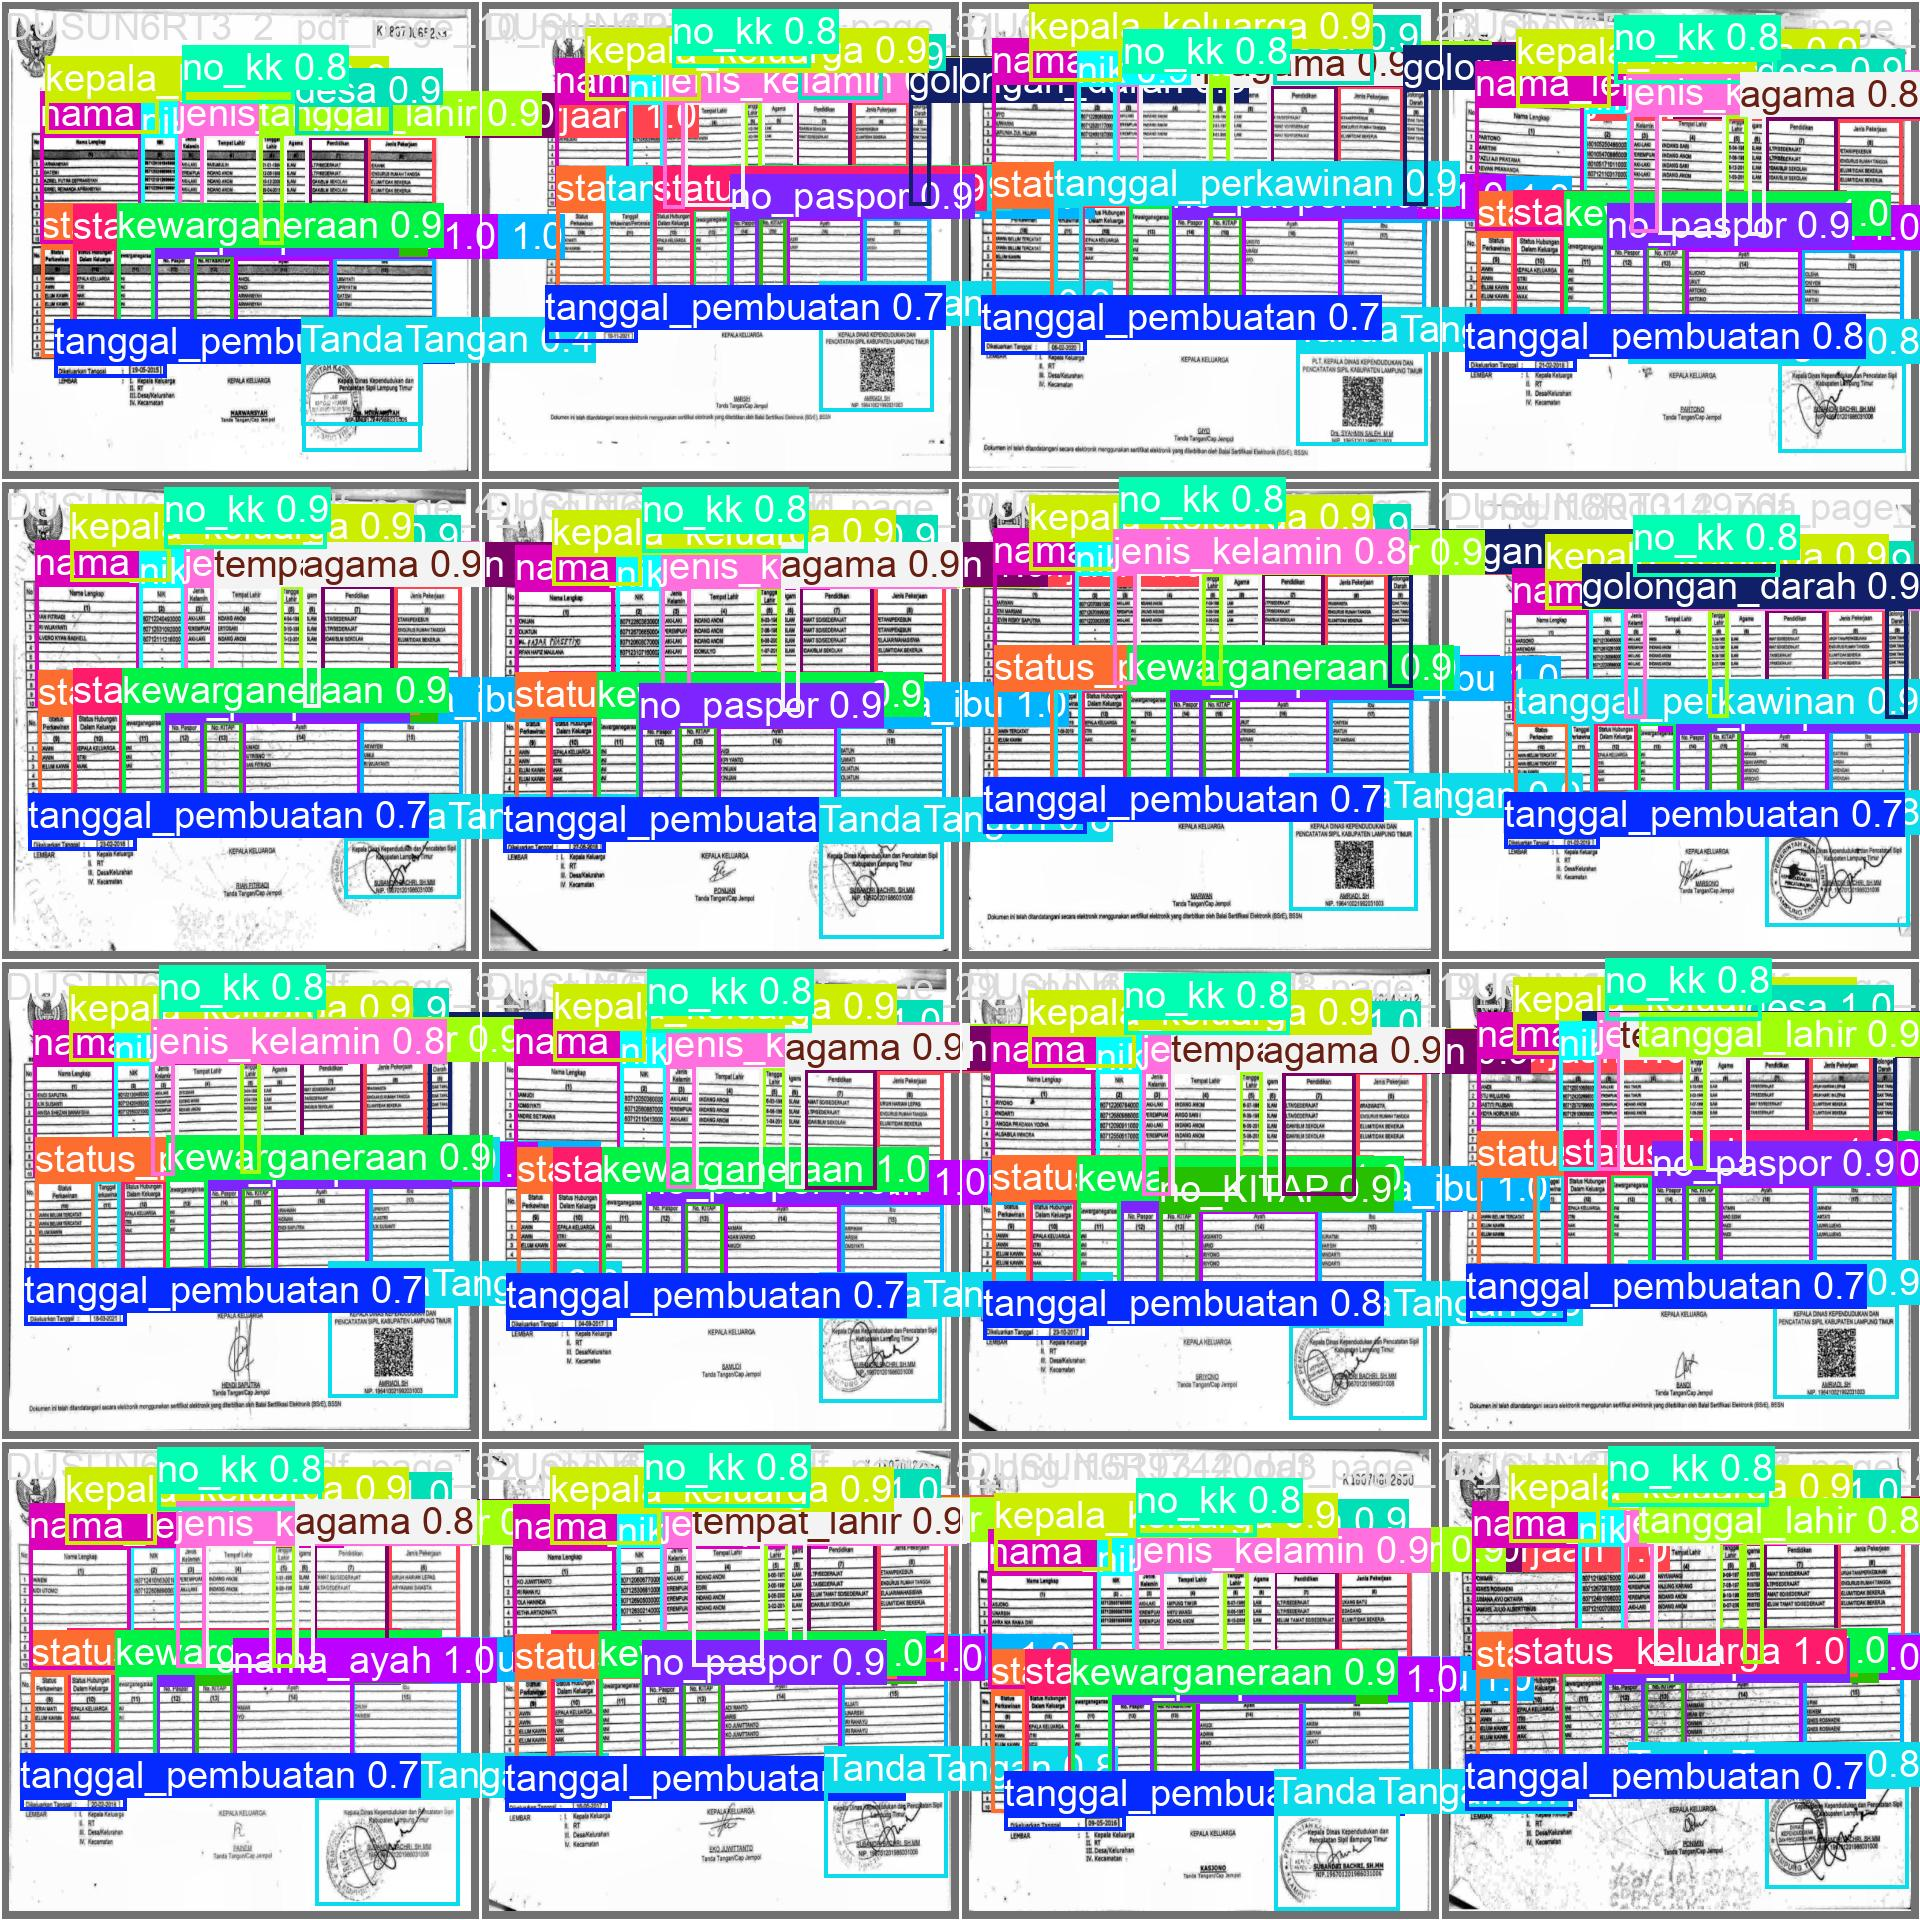

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,134,485 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Kartu-Keluarga-OCR-7/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.79it/s]
                   all         17        353      0.969      0.985      0.981      0.883
           TandaTangan         16         16      0.926          1      0.944      0.669
                 agama         17         17          1      0.956      0.995      0.904
                  desa         17         18      0.985      0.944      0.948      0.788
        golongan_darah          6          6      0.963          1      0.995      0.895
         jenis_kelamin         17         18      0.988      0.944      0.947      0.858
       jenis_pekerjaan

## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,134,485 parameters, 0 gradients, 28.5 GFLOPs

image 1/17 /content/datasets/Kartu-Keluarga-OCR-7/test/images/DUSUN6RT3_2_pdf_page_11_png.rf.134093d2b62bf85cb2802716f9c47f4d.jpg: 800x800 1 TandaTangan, 1 agama, 1 desa, 1 jenis_kelamin, 1 jenis_pekerjaan, 1 kepala_keluarga, 1 kewarganeraan, 1 nama_ayah, 1 nama_ibu, 1 nama_lengkap, 1 nik, 1 no_KITAP, 1 no_kk, 1 no_paspor, 1 pendidikan, 1 status_keluarga, 1 status_perkawinan, 1 tanggal_lahir, 1 tanggal_pembuatan, 1 tempat_lahir, 22.9ms
image 2/17 /content/datasets/Kartu-Keluarga-OCR-7/test/images/DUSUN6RT3_2_pdf_page_13_png.rf.bc5d89b8e0963567297ca17fce4a2d6c.jpg: 800x800 1 TandaTangan, 1 agama, 1 desa, 1 golongan_darah, 1 jenis_kelamin, 1 jenis_pekerjaan, 1 kepala_keluarga, 1 kewarganeraan, 1 nama_ayah, 1 nama_ibu, 1 nama_lengkap, 1 nik, 1 no_KITAP, 1 no_kk, 1 no_paspor, 2 pendidikans, 1 status_keluarga, 1 

**NOTE:** Let's take a look at few results.

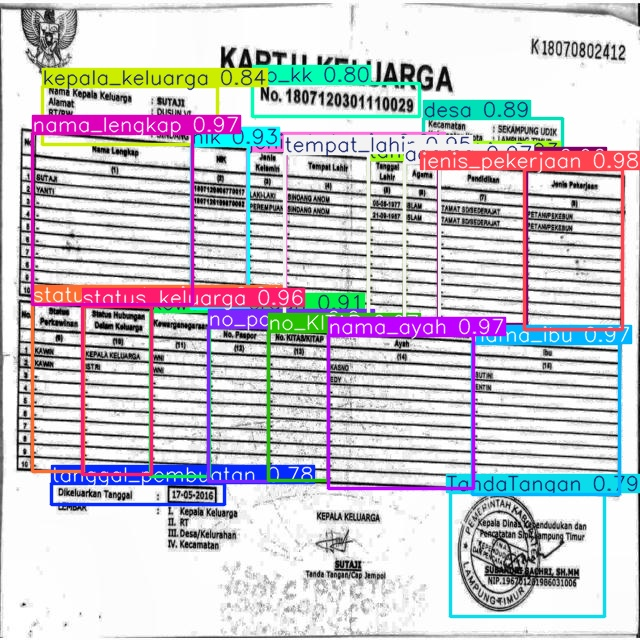

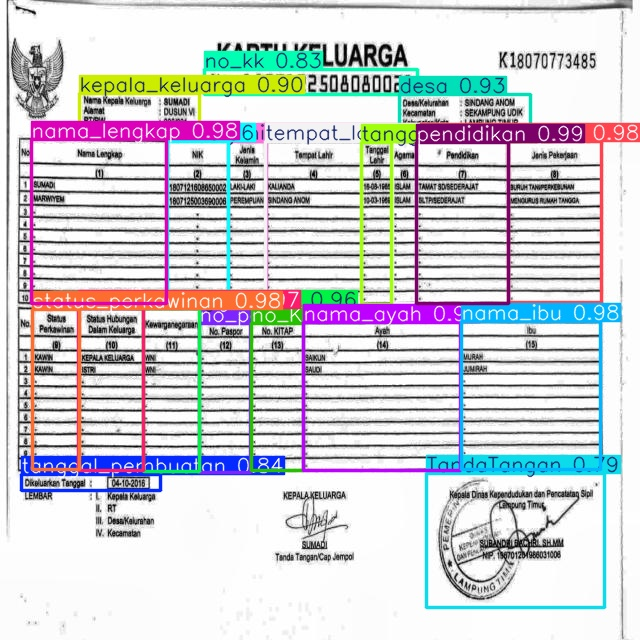

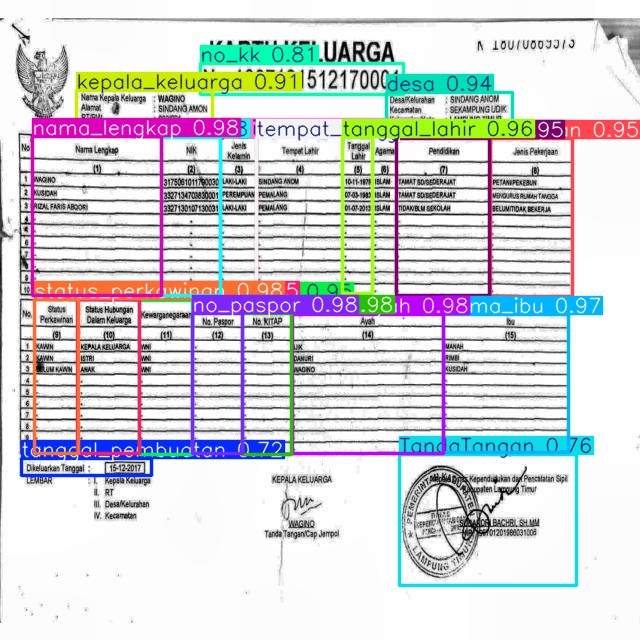

In [20]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [21]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [22]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on DUSUN6RT3_2_pdf_page_16_png.rf.0e112d7037649bbbee89f11e3db932ad.jpg


{'predictions': [{'x': 278.5,
   'y': 208.5,
   'width': 91.0,
   'height': 157.0,
   'confidence': 0.9832970499992371,
   'class': 'tempat_lahir',
   'class_id': 22,
   'detection_id': '1dcd568a-7645-469a-bc65-8d666fdeeb27',
   'image_path': '/content/datasets/Kartu-Keluarga-OCR-7/test/images/DUSUN6RT3_2_pdf_page_16_png.rf.0e112d7037649bbbee89f11e3db932ad.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 248.0,
   'y': 373.5,
   'width': 56.0,
   'height': 161.0,
   'confidence': 0.9806395769119263,
   'class': 'kewarganeraan',
   'class_id': 8,
   'detection_id': '081a1c57-44ee-45a1-a2da-4aeb9bf7e72f',
   'image_path': '/content/datasets/Kartu-Keluarga-OCR-7/test/images/DUSUN6RT3_2_pdf_page_16_png.rf.0e112d7037649bbbee89f11e3db932ad.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 217.0,
   'y': 210.0,
   'width': 32.0,
   'height': 160.0,
   'confidence': 0.9743097424507141,
   'class': 'jenis_kelamin',
   'class_id': 5,
   'detection_id': '0f6cd5bd-13bb-4dd0-

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [25]:
# --- Bagian 0: Instalasi Pustaka yang Diperlukan ---
# Jalankan baris-baris ini untuk memastikan semua pustaka terinstal.
# Ini sangat penting terutama setelah memulai ulang runtime Colab.

print("--- Memulai Instalasi Pustaka ---")
!pip install PyMuPDF      # Untuk konversi PDF ke gambar
!pip install easyocr      # Untuk Optical Character Recognition (OCR)
!pip install opencv-python-headless # Dependensi OpenCV untuk EasyOCR, penting di lingkungan tanpa GUI
!pip install Pillow       # Dependasi umum untuk manipulasi gambar
!pip install numpy        # Dependasi umum untuk komputasi numerik

print("Instalasi pustaka selesai.")

# --- Bagian 1: Impor Pustaka ---
# Impor semua modul yang akan digunakan setelah instalasi selesai.
import os
import fitz # PyMuPDF, diimpor sebagai fitz
import cv2
import numpy as np
from PIL import Image # Pillow library
import json
from ultralytics import YOLO # YOLOv8 model
import easyocr # OCR library

# --- Bagian 2: Konfigurasi Jalur File ---
# SILAKAN GANTI NILAI VARIABEL DI BAWAH INI SESUAI DENGAN LOKASI FILE ANDA!

# PATH_TO_PDF_FILE: Jalur lengkap ke file PDF Kartu Keluarga yang ingin Anda proses.
# Contoh di Google Colab jika Anda mengunggah 'DUSUN3RT2_2.pdf' ke direktori /content/:
PATH_TO_PDF_FILE = "/content/DUSUN3RT2_2.pdf"

# PATH_TO_TRAINED_YOLO_MODEL: Jalur lengkap ke file model YOLOv8 Anda (best.pt).
# Ini adalah hasil pelatihan YOLOv8 Anda di Colab.
# Biasanya ada di 'runs/detect/train/weights/best.pt' jika Anda tidak mengganti nama folder pelatihan.
PATH_TO_TRAINED_YOLO_MODEL = 'runs/detect/train/weights/best.pt'

# Folder untuk menyimpan gambar hasil konversi PDF (akan dibuat jika belum ada)
OUTPUT_IMAGE_FOLDER = "/content/converted_images/"

print("\n--- Konfigurasi Jalur File ---")
print(f"File PDF KK: {PATH_TO_PDF_FILE}")
print(f"Model YOLOv8: {PATH_TO_TRAINED_YOLO_MODEL}")
print(f"Folder Gambar Konversi: {OUTPUT_IMAGE_FOLDER}")

# --- Bagian 3: Konversi PDF ke Gambar ---
print("\n--- Memulai Konversi PDF ke Gambar ---")
os.makedirs(OUTPUT_IMAGE_FOLDER, exist_ok=True) # Buat folder output jika belum ada

converted_image_path = "" # Variabel ini akan menyimpan jalur gambar hasil konversi

try:
    doc = fitz.open(PATH_TO_PDF_FILE)
    if doc.page_count == 0:
        print(f"ERROR: PDF '{PATH_TO_PDF_FILE}' tidak memiliki halaman.")
        exit("Skrip dihentikan: PDF kosong.")
    else:
        # Konversi halaman pertama (indeks 0) dari PDF
        page = doc.load_page(0)
        pix = page.get_pixmap() # Render halaman menjadi pixmap (piksel peta)

        # Tentukan nama file output untuk gambar (mengambil nama dari PDF)
        image_filename = os.path.basename(PATH_TO_PDF_FILE).replace(".pdf", "_page_0.png")
        converted_image_path = os.path.join(OUTPUT_IMAGE_FOLDER, image_filename)
        pix.save(converted_image_path) # Simpan pixmap sebagai file PNG

        print(f"Halaman pertama PDF berhasil dikonversi dan disimpan sebagai: {converted_image_path}")

except FileNotFoundError:
    print(f"ERROR: File PDF tidak ditemukan di jalur: {PATH_TO_PDF_FILE}")
    exit("Skrip dihentikan: File PDF tidak ditemukan.")
except Exception as e:
    print(f"ERROR: Terjadi kesalahan saat mengkonversi PDF: {e}")
    exit("Skrip dihentikan karena kegagalan konversi PDF.")

# --- Bagian 4: Muat Model YOLOv8 yang Telah Dilatih ---
print("\n--- Memuat Model Deteksi Objek YOLOv8 ---")
yolo_model = None
try:
    yolo_model = YOLO(PATH_TO_TRAINED_YOLO_MODEL)
    print(f"Model YOLOv8 berhasil dimuat dari: {PATH_TO_TRAINED_YOLO_MODEL}")
except Exception as e:
    print(f"ERROR: Gagal memuat model YOLOv8. Pastikan file '{PATH_TO_TRAINED_YOLO_MODEL}' ada dan valid.")
    print(e)
    exit("Skrip dihentikan: Kegagalan memuat model YOLOv8.")

# --- Bagian 5: Muat EasyOCR Reader ---
print("\n--- Menginisialisasi EasyOCR Reader ---")
ocr_reader = None
try:
    # Pilih bahasa yang relevan. 'id' untuk Indonesia, 'en' untuk Inggris.
    ocr_reader = easyocr.Reader(['id', 'en'])
    print("EasyOCR reader berhasil diinisialisasi.")
except Exception as e:
    print(f"ERROR: Gagal menginisialisasi EasyOCR reader. Pastikan dependensi terinstal dengan benar.")
    print(e)
    exit("Skrip dihentikan: Kegagalan menginisialisasi EasyOCR.")

# --- Bagian 6: Lakukan Inferensi (Deteksi Objek) pada Gambar KK ---
print(f"\n--- Menjalankan Inferensi (Deteksi Objek) pada: {converted_image_path} ---")
results = None
original_image_bgr = None

if not os.path.exists(converted_image_path):
    print(f"ERROR: Gambar uji tidak ditemukan di jalur ini: {converted_image_path}")
    exit("Skrip dihentikan: Gambar uji tidak ditemukan.")
else:
    # Muat gambar asli untuk inferensi dan OCR menggunakan OpenCV
    original_image_bgr = cv2.imread(converted_image_path)
    if original_image_bgr is None:
        print(f"ERROR: Tidak dapat memuat gambar asli dari {converted_image_path}. Pastikan itu adalah gambar yang valid.")
        exit("Skrip dihentikan: Gambar asli tidak dapat dimuat.")

    try:
        # Lakukan prediksi menggunakan model YOLOv8. save=False karena kita hanya butuh hasil di memori.
        # conf=0.25 adalah ambang batas kepercayaan default, sesuaikan jika perlu.
        results = yolo_model.predict(source=original_image_bgr, conf=0.25, save=False)
        print("Inferensi deteksi objek selesai.")

    except Exception as e:
        print(f"ERROR: Terjadi kesalahan saat menjalankan inferensi YOLOv8: {e}")
        exit("Skrip dihentikan karena kegagalan inferensi.")

# --- Bagian 7: Iterasi Hasil Deteksi dan Lakukan OCR ---
print("\n--- Melakukan OCR pada setiap area yang terdeteksi ---")

extracted_kk_data = {} # Dictionary untuk menyimpan semua data yang diekstraksi

if not results or not original_image_bgr is not None:
    print("Tidak ada hasil deteksi atau gambar asli tidak dimuat. Proses OCR dilewati.")
else:
    # Loop melalui setiap hasil prediksi (biasanya hanya satu untuk satu gambar input)
    for r in results:
        if r.boxes: # Pastikan ada deteksi objek di gambar ini
            for box in r.boxes:
                # Dapatkan koordinat bounding box (xyxy: x_min, y_min, x_max, y_max)
                x1, y1, x2, y2 = [int(coord) for coord in box.xyxy[0].tolist()]

                # Dapatkan ID kelas dan nama kelas dari model YOLO
                class_id = int(box.cls[0].item())
                class_name = yolo_model.names[class_id]
                confidence = round(box.conf[0].item(), 2)

                # Pastikan koordinat ada di dalam batas gambar untuk menghindari error saat cropping
                h, w, _ = original_image_bgr.shape
                x1, y1, x2, y2 = max(0, x1), max(0, y1), min(w, x2), min(h, y2)

                # Lewati deteksi dengan koordinat tidak valid (misal, kotak sangat kecil atau terbalik)
                if x2 <= x1 or y2 <= y1:
                    print(f"  [SKIPPED] Deteksi '{class_name}' (Conf: {confidence}) karena koordinat tidak valid: [{x1}, {y1}, {x2}, {y2}]")
                    continue

                # Potong (crop) area yang terdeteksi dari gambar asli
                cropped_img = original_image_bgr[y1:y2, x1:x2]

                # Lakukan OCR pada gambar yang sudah dipotong. detail=0 akan mengembalikan hanya teks.
                ocr_results = ocr_reader.readtext(cropped_img, detail=0)

                # Gabungkan semua teks yang ditemukan di area ini menjadi satu string
                detected_text = " ".join(ocr_results).strip()

                print(f"  [{class_name}] (Conf: {confidence}): '{detected_text}'")

                # Simpan data yang diekstraksi ke dictionary
                extracted_kk_data[class_name] = detected_text

        else:
            print("Tidak ada deteksi objek ditemukan di gambar ini.")

# --- Bagian 8: Tampilkan dan Simpan Hasil Akhir ---
print("\n--- Ringkasan Data KK yang Diekstraksi ---")
# Mencetak dictionary dalam format JSON yang mudah dibaca
# ensure_ascii=False penting jika ada karakter non-ASCII (misalnya bahasa Indonesia)
print(json.dumps(extracted_kk_data, indent=4, ensure_ascii=False))

# (Opsional) Simpan hasil ekstraksi ke dalam file JSON
output_json_filename = 'extracted_kk_data_final.json'
try:
    with open(output_json_filename, 'w', encoding='utf-8') as f:
        json.dump(extracted_kk_data, f, indent=4, ensure_ascii=False)
    print(f"\nData diekstraksi dan disimpan ke '{output_json_filename}'.")
except Exception as e:
    print(f"ERROR: Gagal menyimpan data ke file JSON: {e}")

print("\nProses OCR lengkap selesai.")

--- Memulai Instalasi Pustaka ---
  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
  Using cached python_bidi-0.6.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached pyclipper-1.3.0.post6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
  Using cached ninja-1.11.1.4-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.0 kB)
Using cached easyocr-1.7.2-py3-none-any.whl (2.9 MB)
Using cached ninja-1.11.1.4-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (422 kB)
Using cached pyclipper-1.3.0.post6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (969 kB)
Using cached python_bidi-0.6.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (292 kB)
Instalasi pustaka selesai.



--- Konfigurasi Jalur File ---
File PDF KK: /content/DUSUN3RT2_2.pdf
Model YOLOv8: runs/detect/train/weights/best.pt
Folder Gambar Konversi: /content/converted_images/

--- Memulai Konversi PDF ke Gambar ---
ERROR: Terjadi kesalahan saat mengkonversi PDF: no such file: '/content/DUSUN3RT2_2.pdf'

--- Memuat Model Deteksi Objek YOLOv8 ---
Model YOLOv8 berhasil dimuat dari: runs/detect/train/weights/best.pt

--- Menginisialisasi EasyOCR Reader ---
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteEasyOCR reader berhasil diinisialisasi.

--- Menjalankan Inferensi (Deteksi Objek) pada:  ---
ERROR: Gambar uji tidak ditemukan di jalur ini: 

--- Melakukan OCR pada setiap area yang terdeteksi ---
Tidak ada hasil deteksi atau gambar asli tidak dimuat. Proses OCR dilewati.

--- Ringkasan Data KK yang Diekstraksi ---
{}

Data diekstraksi dan disimpan ke 'extracted_kk_data_final.json'.

Proses OCR lengkap selesai.
